## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [10]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [12]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [14]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [16]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [17]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [18]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [19]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7033 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [21]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [22]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7033.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.610181
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.500000
50%,29.000000,70.350000,0.000000,1397.650000
75%,55.000000,89.850000,0.000000,3794.500000
90%,69.000000,102.600000,1.000000,5976.380000
95%,72.000000,107.400000,1.000000,6923.380000
99%,72.000000,114.729000,1.000000,8039.826000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [23]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             10
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [24]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.14
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [25]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [26]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
878,1.121664,1,0,-0.000851,0.772671,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
5790,0.308955,0,1,-0.462727,-0.109276,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.275828,1,1,0.582309,-0.969779,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
879,0.024507,1,1,-0.336459,-0.272790,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2783,0.430861,1,1,0.974405,0.802525,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1


In [33]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.574719181003836

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [34]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

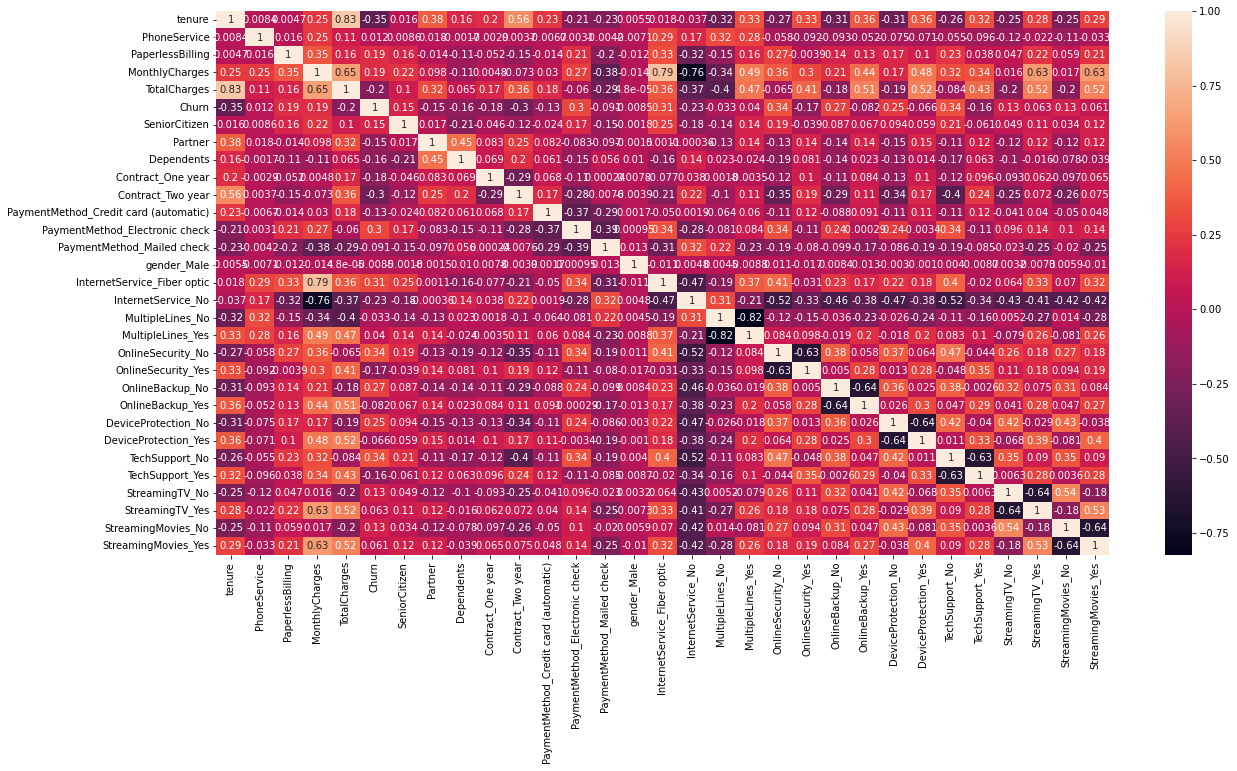

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [36]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

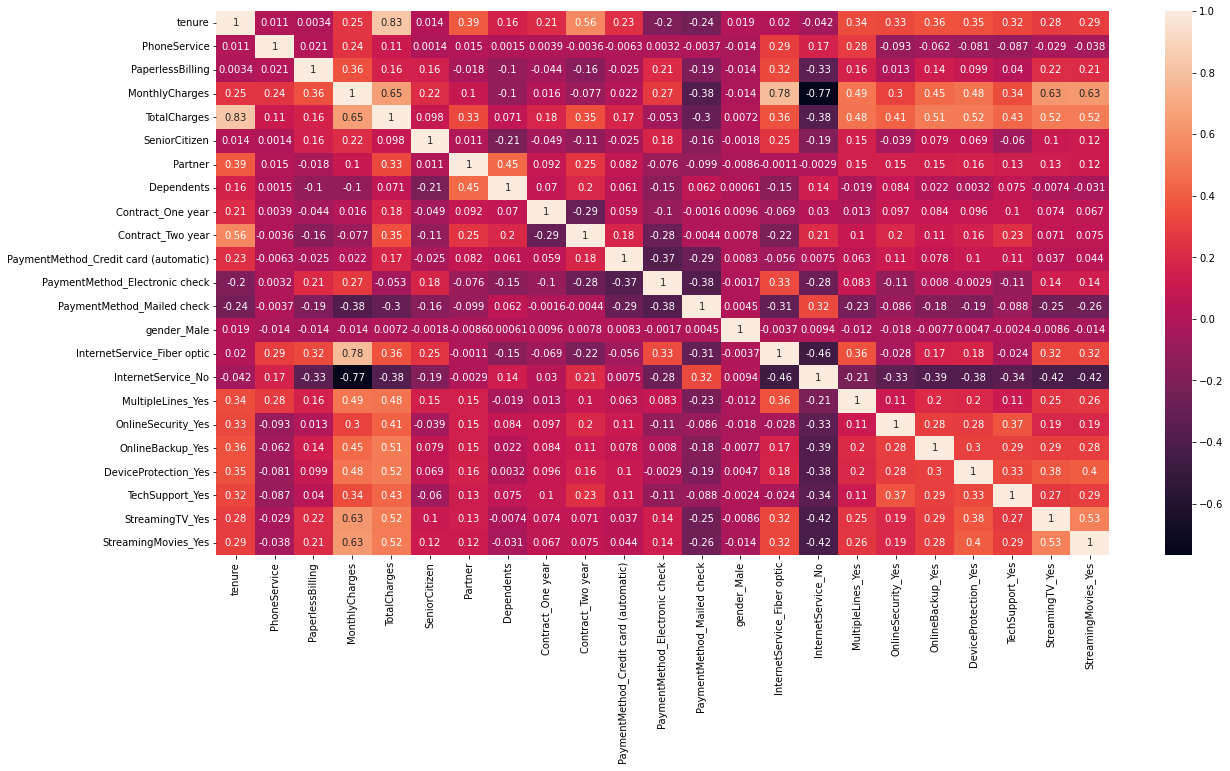

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [38]:
import statsmodels.api as sm

In [39]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.5
Date:                Sun, 24 Dec 2023   Deviance:                       4023.1
Time:                        17:05:13   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2857
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.6283      1.510     -2.403      0.016      -6.588      -0.668
tenure                                   -1.5905      0.188     -8.476      0.000      -1.958      -1.223
PhoneService                              0.5093      0.769      0.662      0.508      -0.999       2.017
PaperlessBilling                          0.3324      0.090      3.711      0.000       0.157       0.508
MonthlyCharges                           -1.8463      1.134     -1.628      0.103      -4.068       0.376
TotalCharges                              0.7796      0.195      3.999      0.000       0.398       1.162
SeniorCitizen                             0.2418      0.101      2.387      0.017       0.043       0.440
Partner                                   0.0922      0.094      0.980      0.327      -0.092       0.277
Dependents                               -0.1725      0.107     -1.610      0.107      -0.383       0.037
Contract_One year                        -0.6418      0.128     -5.012      0.000      -0.893      -0.391
Contract_Two year                        -1.3529      0.213     -6.357      0.000      -1.770      -0.936
PaymentMethod_Credit card (automatic)    -0.0284      0.136     -0.209      0.835      -0.295       0.239
PaymentMethod_Electronic check            0.3702      0.113      3.284      0.001       0.149       0.591
PaymentMethod_Mailed check               -0.0277      0.139     -0.200      0.842      -0.299       0.244
gender_Male                              -0.0371      0.078     -0.475      0.635      -0.190       0.116
InternetService_Fiber optic               2.3589      0.947      2.492      0.013       0.504       4.214
InternetService_No                       -2.3039      0.959     -2.401      0.016      -4.184      -0.423
MultipleLines_Yes                         0.5594      0.211      2.647      0.008       0.145       0.974
OnlineSecurity_Yes                       -0.1039      0.213     -0.488      0.625      -0.521       0.313
OnlineBackup_Yes                          0.1222      0.208      0.587      0.557      -0.286       0.530
DeviceProtection_Yes                      0.3140      0.209      1.500      0.134      -0.096       0.724
TechSupport_Yes                           0.0381      0.214      0.178      0.859      -0.381       0.457
StreamingTV_Yes                           0.8019      0.388      2.066      0.039       0.041       1.563
StreamingMovies_Yes                       0.8060      0.386      2.087      0.037       0.049       1.563
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 4),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 8),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 9),
 ('gender_Male', False, 5),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]

In [45]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [46]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2016.4
Date:                Sun, 24 Dec 2023   Deviance:                       4032.7
Time:                        17:05:14   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2843
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3200      0.170     -7.766      0.000      -1.653      -0.987
tenure                            -1.5536      0.183     -8.489      0.000      -1.912      -1.195
PhoneService                      -0.7074      0.159     -4.458      0.000      -1.018      -0.396
PaperlessBilling                   0.3306      0.089      3.706      0.000       0.156       0.506
TotalCharges                       0.7121      0.189      3.772      0.000       0.342       1.082
SeniorCitizen                      0.2695      0.099      2.711      0.007       0.075       0.464
Contract_One year                 -0.6523      0.127     -5.125      0.000      -0.902      -0.403
Contract_Two year                 -1.3572      0.212     -6.403      0.000      -1.773      -0.942
PaymentMethod_Electronic check     0.3927      0.083      4.739      0.000       0.230       0.555
InternetService_Fiber optic        0.8517      0.117      7.291      0.000       0.623       1.081
InternetService_No                -0.7397      0.164     -4.512      0.000      -1.061      -0.418
MultipleLines_Yes                  0.2574      0.096      2.685      0.007       0.070       0.445
OnlineSecurity_Yes                -0.4117      0.102     -4.055      0.000      -0.611      -0.213
TechSupport_Yes                   -0.2743      0.102     -2.691      0.007      -0.474      -0.074
StreamingTV_Yes                    0.1936      0.098      1.985      0.047       0.002       0.385
StreamingMovies_Yes                0.2065      0.097      2.120      0.034       0.016       0.397
==================================================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

878     0.019687
5790    0.319873
6498    0.698290
879     0.158204
2783    0.378002
3873    0.009057
5387    0.477989
6623    0.796446
4464    0.321513
5279    0.001666
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0196871 , 0.31987313, 0.69829006, 0.15820438, 0.37800197,
       0.00905704, 0.47798895, 0.79644568, 0.32151326, 0.00166578])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [49]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.019687,878
1,0,0.319873,5790
2,1,0.698290,6498
3,0,0.158204,879
4,0,0.378002,2783


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [50]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.019687,878,0
1,0,0.319873,5790,0
2,1,0.698290,6498,1
3,0,0.158204,879,0
4,0,0.378002,2783,0


In [51]:
from sklearn import metrics

In [52]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3269  356]
 [ 578  720]]


In [53]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8102782855982125


#### Checking VIFs

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.65
3,TotalCharges,7.79
0,tenure,6.73
8,InternetService_Fiber optic,4.01
6,Contract_Two year,3.25
9,InternetService_No,3.20
2,PaperlessBilling,2.73
14,StreamingMovies_Yes,2.70
13,StreamingTV_Yes,2.66
10,MultipleLines_Yes,2.52


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [57]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [58]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.3
Date:                Sun, 24 Dec 2023   Deviance:                       4052.5
Time:                        17:05:14   Pearson chi2:                 5.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2815
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8079      0.132    -13.688      0.000      -2.067      -1.549
tenure                            -1.3907      0.180     -7.728      0.000      -1.743      -1.038
PaperlessBilling                   0.3291      0.089      3.701      0.000       0.155       0.503
TotalCharges                       0.5539      0.186      2.975      0.003       0.189       0.919
SeniorCitizen                      0.2959      0.099      2.988      0.003       0.102       0.490
Contract_One year                 -0.6617      0.127     -5.207      0.000      -0.911      -0.413
Contract_Two year                 -1.3446      0.212     -6.353      0.000      -1.759      -0.930
PaymentMethod_Electronic check     0.4051      0.083      4.905      0.000       0.243       0.567
InternetService_Fiber optic        0.6834      0.109      6.281      0.000       0.470       0.897
InternetService_No                -0.9442      0.156     -6.056      0.000      -1.250      -0.639
MultipleLines_Yes                  0.1903      0.094      2.030      0.042       0.007       0.374
OnlineSecurity_Yes                -0.4138      0.101     -4.085      0.000      -0.612      -0.215
TechSupport_Yes                   -0.2898      0.102     -2.851      0.004      -0.489      -0.091
StreamingTV_Yes                    0.2266      0.097      2.334      0.020       0.036       0.417
StreamingMovies_Yes                0.2421      0.097      2.500      0.012       0.052       0.432
==================================================================================================
"""

In [59]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [60]:
y_train_pred[:10]

array([0.02389816, 0.25063253, 0.69990105, 0.18637265, 0.37134597,
       0.00649627, 0.35064494, 0.79110992, 0.32443946, 0.00212457])

In [61]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.023898,878,0
1,0,0.250633,5790,0
2,1,0.699901,6498,1
3,0,0.186373,879,0
4,0,0.371346,2783,0


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8100751574243348


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.72
0,tenure,6.62
7,InternetService_Fiber optic,3.15
5,Contract_Two year,3.10
13,StreamingMovies_Yes,2.69
12,StreamingTV_Yes,2.65
1,PaperlessBilling,2.58
8,InternetService_No,2.29
9,MultipleLines_Yes,2.28
11,TechSupport_Yes,1.97


In [65]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4923
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.9
Date:                Sun, 24 Dec 2023   Deviance:                       4061.7
Time:                        17:05:14   Pearson chi2:                 5.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2801
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8843      0.129    -14.628      0.000      -2.137      -1.632
tenure                            -0.9014      0.065    -13.834      0.000      -1.029      -0.774
PaperlessBilling                   0.3268      0.089      3.680      0.000       0.153       0.501
SeniorCitizen                      0.2970      0.099      2.987      0.003       0.102       0.492
Contract_One year                 -0.6530      0.126     -5.178      0.000      -0.900      -0.406
Contract_Two year                 -1.3266      0.210     -6.322      0.000      -1.738      -0.915
PaymentMethod_Electronic check     0.3967      0.083      4.794      0.000       0.235       0.559
InternetService_Fiber optic        0.8298      0.097      8.554      0.000       0.640       1.020
InternetService_No                -0.9410      0.155     -6.060      0.000      -1.245      -0.637
MultipleLines_Yes                  0.2373      0.092      2.575      0.010       0.057       0.418
OnlineSecurity_Yes                -0.3775      0.101     -3.747      0.000      -0.575      -0.180
TechSupport_Yes                   -0.2466      0.101     -2.448      0.014      -0.444      -0.049
StreamingTV_Yes                    0.2900      0.095      3.064      0.002       0.104       0.475
StreamingMovies_Yes                0.3059      0.094      3.241      0.001       0.121       0.491
==================================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
y_train_pred[:10]

array([0.02823473, 0.30080089, 0.69402172, 0.20713348, 0.36498805,
       0.01080879, 0.33312743, 0.79467662, 0.33514995, 0.00500639])

In [69]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.028235,878,0
1,0,0.300801,5790,0
2,1,0.694022,6498,1
3,0,0.207133,879,0
4,0,0.364988,2783,0


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8062157221206582


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.96
6,InternetService_Fiber optic,2.76
12,StreamingMovies_Yes,2.60
11,StreamingTV_Yes,2.55
1,PaperlessBilling,2.51
8,MultipleLines_Yes,2.25
10,TechSupport_Yes,1.94
7,InternetService_No,1.91
0,tenure,1.89
3,Contract_One year,1.81


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [73]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3276,  349],
       [ 605,  693]], dtype=int64)

In [74]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8062157221206582

## Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5338983050847458

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.9037241379310345

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09627586206896552


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.6650671785028791


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8441123421798505


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

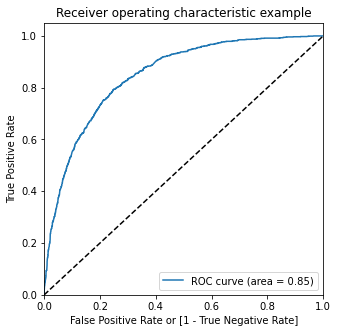

In [84]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028235,878,0,1,0,0,0,0,0,0,0,0,0
1,0,0.300801,5790,0,1,1,1,1,0,0,0,0,0,0
2,1,0.694022,6498,1,1,1,1,1,1,1,1,0,0,0
3,0,0.207133,879,0,1,1,1,0,0,0,0,0,0,0
4,0,0.364988,2783,0,1,1,1,1,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.263660  1.000000  0.000000
0.1   0.1  0.606947  0.939908  0.487724
0.2   0.2  0.714808  0.855932  0.664276
0.3   0.3  0.767621  0.772727  0.765793
0.4   0.4  0.795247  0.649461  0.847448
0.5   0.5  0.806216  0.533898  0.903724
0.6   0.6  0.801341  0.402157  0.944276
0.7   0.7  0.775137  0.204160  0.979586
0.8   0.8  0.746699  0.046995  0.997241
0.9   0.9  0.736340  0.000000  1.000000


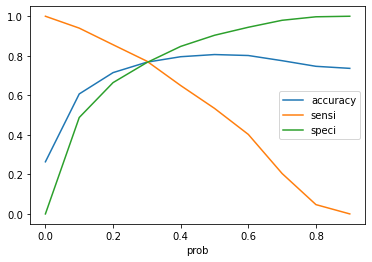

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.028235,878,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.300801,5790,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.694022,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.207133,879,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.364988,2783,0,1,1,1,1,0,0,0,0,0,0,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7676213690838919

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2776,  849],
       [ 295, 1003]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7727272727272727

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7657931034482759

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23420689655172414


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5415766738660908


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9039400846629763


## Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3276,  349],
       [ 605,  693]], dtype=int64)

##### Precision
TP / TP + FP

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6650671785028791

##### Recall
TP / TP + FN

In [100]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5338983050847458

Using sklearn utilities for the same

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
?precision_score

In [103]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6650671785028791

In [104]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5338983050847458

### Precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4918    0
 4919    0
 4920    0
 4921    0
 4922    0
 Name: Churn, Length: 4923, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 4918    0
 4919    0
 4920    0
 4921    0
 4922    0
 Name: predicted, Length: 4923, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

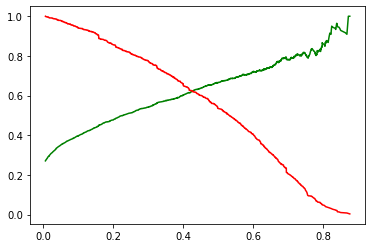

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [109]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [110]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
941,-0.788202,0,0,0,0,1,0,0,0,0,0,0,0
3729,1.202935,1,0,0,1,0,0,1,0,0,0,0,0
1760,0.715310,0,0,1,0,0,0,0,1,0,0,0,0
2282,1.365477,1,1,0,0,0,1,0,1,0,0,1,1
1871,0.755945,1,0,0,0,1,1,0,1,1,0,0,1


In [111]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [112]:
y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

941     0.314937
3729    0.007322
1760    0.049982
2282    0.303975
1871    0.300101
1969    0.026415
2531    0.006681
1615    0.022760
2484    0.111233
5914    0.136953
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
941,0.314937
3729,0.007322
1760,0.049982
2282,0.303975
1871,0.300101


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Churn,CustID,0
0,0,941,0.314937
1,0,3729,0.007322
2,0,1760,0.049982
3,1,2282,0.303975
4,0,1871,0.300101


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [123]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,941,0,0.314937
1,3729,0,0.007322
2,1760,0,0.049982
3,2282,1,0.303975
4,1871,0,0.300101


In [124]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [125]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,941,0,0.314937,0
1,3729,0,0.007322,0
2,1760,0,0.049982,0
3,2282,1,0.303975,0
4,1871,0,0.300101,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7791469194312797

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1296,  243],
       [ 223,  348]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6094570928196147

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8421052631578947